In [109]:
# include matplotlib pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [110]:
pd.set_option('display.max_columns', None)

### Loading the clients data

In [111]:
# read the data
clients_data = pd.read_csv('clients_data_competition.csv')
orders_data = pd.read_csv('orders_data_competition.csv')

### Fix client's data

In [112]:
clients_data = clients_data[clients_data['Company Name'] == 'HSB']
clients_data['OpenDate'] = pd.to_datetime(clients_data['OpenDate'])
clients_data['BirthDate'] = pd.to_datetime(clients_data['BirthDate'])

orders_data = orders_data[orders_data['Order Via'] == 'Online']
#convert the date to datetime
orders_data['Order Time'] = pd.to_datetime(orders_data['Order Time'])
orders_data['Expire Date'] = pd.to_datetime(orders_data['Expire Date'])

# change Client Type Name to 0 (Individual) and 1 (Companies)
clients_data['Client Type Name'] = clients_data['Client Type Name'].map({'Individuals': 0, 'Companies': 1})

In [113]:
clients_data['Is Dormant'] = clients_data['Is Dormant'].replace(-1.0, 1)
clients_data['Is Dormant'] = clients_data['Is Dormant'].astype(int)

In [114]:
merged_data = clients_data.merge(orders_data, on='Account ID')
merged_data

merged_data['Net Income'] = np.where(merged_data['Order Type'] == 'Sell', merged_data['Executed Quantity'] * merged_data['Price'], -merged_data['Executed Quantity'] * merged_data['Price'])

In [115]:
merged_data

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity,Net Income
0,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,61011,Egypt,19,Buy,2024-02-28 11:06:33,Online,1,0,2024-02-28,Executed,720,68.550,Real Estate,720,720,-49356.0
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.700,INDUSTRIAL,1175,1175,9047.5
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.900,Industries,1000,1000,-9900.0
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.850,Industries,1000,1000,9850.0
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.950,Industries,1000,1000,9950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838586,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811540,Egypt,30,Buy,2024-03-06 13:04:18,Online,1,0,2024-03-06,Executed,74,67.500,Industries,74,74,-4995.0
1838587,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811797,Egypt,6,Buy,2024-03-06 13:23:30,Online,1,0,2024-03-06,Executed,1250,3.530,Industries,1250,1250,-4412.5
1838588,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1977414,Egypt,9,Sell,2024-03-07 09:51:43,Online,0,1,2024-03-07,Not Executed,65,5.240,Financials,0,65,0.0
1838589,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1987832,Egypt,248,Buy,2024-03-10 14:22:37,Online,0,1,2024-03-10,Not Executed,40,1.249,INVESTMENT,0,40,0.0


### Exploration

In [116]:
data = clients_data['Is Profile Suspended'].sum()
print(data)

2260


In [117]:
merged_data.shape

(1838591, 28)

In [118]:
canceled_data = merged_data[merged_data["Is Canceled"] == 1]
canceled_data.shape

(380468, 28)

In [119]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] == 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()

/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_17889/848986123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    4.379100e+04
mean     1.972624e+04
std      4.233853e+05
min     -5.829700e+06
25%     -8.325000e+03
50%      1.289200e+03
75%      1.498750e+04
max      4.359570e+07
Name: Transaction Amount, dtype: float64

In [120]:
# merged_data = merged_data[merged_data["Is Canceled"] == 1]
# merged_data.shape

In [121]:
# merged_data.value_counts("Is Canceled")

In [122]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] != 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()


/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_17889/3085000630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    1.794800e+06
mean     7.613886e+03
std      6.940287e+05
min     -3.331950e+07
25%     -1.065000e+04
50%      9.364300e+02
75%      1.452000e+04
max      8.851400e+08
Name: Transaction Amount, dtype: float64

In [123]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] == 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()


/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_17889/2910621161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    4.379100e+04
mean     1.972624e+04
std      4.233853e+05
min     -5.829700e+06
25%     -8.325000e+03
50%      1.289200e+03
75%      1.498750e+04
max      4.359570e+07
Name: Transaction Amount, dtype: float64

In [124]:
#plot the orders of the suspended profiles
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [125]:

# Define 'Churned' column based on 'Is Closed' or 'Is Dormant'
clients_data['Churned'] = np.where((clients_data['Is Closed'] == 1) | (clients_data['Is Dormant'] == 1), 1, 0)


In [126]:
# get todays date in dt
today = pd.to_datetime('today').normalize()
today

Timestamp('2024-04-21 00:00:00')

In [127]:
# get dormant customers from merged df
dormant_customers = merged_data[merged_data['Is Dormant'] == 1]
# group customers using client id and get the last order time
dormant_customers = dormant_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
dormant_customers['Years Since Last Order'] = (pd.to_datetime('today') - dormant_customers['Order Time']).dt.days

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc3c6a1970>]],
      dtype=object)

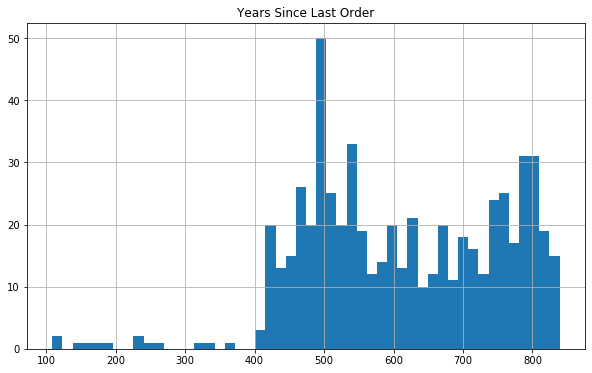

In [128]:
dormant_customers.hist('Years Since Last Order', bins=50, figsize=(10, 6))

In [129]:
# get dormant customers from merged df
dormant_customers = merged_data[merged_data['Is Dormant'] == 1]
# group customers using client id and get the last order time
dormant_customers = dormant_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
dormant_customers['Years Since Last Order'] = (pd.to_datetime('today') - dormant_customers['Order Time']).dt.days

In [130]:
# sort the data primarly by customer id and secondly by the order time in ascending order
sorted_customers = merged_data.sort_values(['Client ID', 'Order Time'])
sorted_customers.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity,Net Income
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.70,INDUSTRIAL,1175,1175,9047.5
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.90,Industries,1000,1000,-9900.0
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.85,Industries,1000,1000,9850.0
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.95,Industries,1000,1000,9950.0
5,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227924,Egypt,66,Buy,2022-01-05 11:50:26,Online,0,0,2022-01-05,Not Executed,1500,9.31,Industries,0,1500,0.0


In [131]:
# create a new dataframe per customer that has its transactions sorted by order time
customer_transactions = sorted_customers.reset_index(drop=True).groupby('Client ID').apply(lambda x: x.sort_values('Order Time'))
customer_transactions

Client ID  Account ID Gender     Risk Rate Company Name  \
Client ID                                                                    
2         0                2           2   Male           Low          HSB   
          1                2           2   Male           Low          HSB   
          2                2           2   Male           Low          HSB   
          3                2           2   Male           Low          HSB   
          4                2           2   Male           Low          HSB   
...                      ...         ...    ...           ...          ...   
9121      1838586       9121       13520   Male  Not Assigned          HSB   
          1838587       9121       13520   Male  Not Assigned          HSB   
          1838588       9121       13520   Male  Not Assigned          HSB   
          1838589       9121       13520   Male  Not Assigned          HSB   
9122      1838590       9122       13521   Male  Not Assigned          HSB   

                   Is Closed  Is Dormant  Is Profile Suspended  \
Client ID                                                        
2         0                0           0                     0   
          1                0           0                     0   
          2                0           0                     0   
          3                0           0                     0   
          4                0           0                     0   
...                      ...         ...                   ...   
9121      1838586          0           0                     0   
          1838587          0           0                     0   
          1838588          0           0                     0   
          1838589          0           0                     0   
9122      1838590          0           0                     0   

                   Is Client Suspended  Client Type Name   OpenDate  \
Client ID                                                             
2         0                          0                 0 2014-02-17   
          1                          0                 0 2014-02-17   
          2                          0                 0 2014-02-17   
          3                          0                 0 2014-02-17   
          4                          0                 0 2014-02-17   
...                                ...               ...        ...   
9121      1838586                    0                 0 2024-03-04   
          1838587                    0                 0 2024-03-04   
          1838588                    0                 0 2024-03-04   
          1838589                    0                 0 2024-03-04   
9122      1838590                    0                 0 2024-03-04   

                   BirthDate  Order ID Market Key  Security ID Order Type  \
Client ID                                                                   
2         0       1971-05-14    225079      Egypt          152       Sell   
          1       1971-05-14    227773      Egypt           66        Buy   
          2       1971-05-14    227827      Egypt           66       Sell   
          3       1971-05-14    227850      Egypt           66       Sell   
          4       1971-05-14    227924      Egypt           66        Buy   
...                      ...       ...        ...          ...        ...   
9121      1838586 1953-09-11     44393      Egypt            9       Sell   
          1838587 1953-09-11   1977414      Egypt            9       Sell   
          1838588 1953-09-11     89272      Egypt            9       Sell   
          1838589 1953-09-11   1987832      Egypt          248        Buy   
9122      1838590 1993-05-24     89961      Egypt           78        Buy   

                           Order Time Order Via  Is Completed  Is Canceled  \
Client ID                                                                    
2         0       2022-01-04 12:06:31    Online             1  

In [132]:
# Sort data by Account ID and OrderDate to ensure the order dates are in chronological order
sorted_customers.sort_values(by=['Account ID', 'Order Time'], inplace=True)

# Calculate the difference in hrs between each order for each account
sorted_customers['OrderDiff'] = sorted_customers.groupby('Account ID')['Order Time'].diff().dt.days

# Calculate the average difference in time between orders for each account
average_order_diff = sorted_customers.groupby('Account ID')['OrderDiff'].mean().reset_index(name='Average Order Difference')


# Display the first few rows of the average order difference data
average_order_diff

,Account ID,Average Order Difference
0,2,38.950000
1,3,4.511628
2,4,26.413793
3,7,0.851852
4,12,0.547619
...,...,...
6727,13510,0.200000
6728,13512,0.000000
6729,13519,0.000000
6730,13520,0.187500


In [133]:
sorted_customers.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity,Net Income,OrderDiff
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.70,INDUSTRIAL,1175,1175,9047.5,NaN
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.90,Industries,1000,1000,-9900.0,0.0
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.85,Industries,1000,1000,9850.0,0.0
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.95,Industries,1000,1000,9950.0,0.0
5,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227924,Egypt,66,Buy,2022-01-05 11:50:26,Online,0,0,2022-01-05,Not Executed,1500,9.31,Industries,0,1500,0.0,0.0


In [134]:
# get net income from the transactions by multiplying the executed quantity and price
sorted_customers['Net Income'] = np.where(sorted_customers['Order Type'] == 'Sell', sorted_customers['Executed Quantity'] * sorted_customers['Price'], -sorted_customers['Executed Quantity'] * sorted_customers['Price'])

In [135]:
sorted_customers['Net Income'].describe()

count    1.838591e+06
mean     1.771999e+03
std      1.047931e+05
min     -8.500000e+06
25%     -2.565000e+03
50%      0.000000e+00
75%      8.099500e+02
max      1.561500e+07
Name: Net Income, dtype: float64

In [136]:
# group by Account ID and get the count of the rows
orders_count = sorted_customers.groupby('Account ID').size().reset_index(name='Orders Count')



In [137]:
(orders_count == 1).sum()

Account ID        0
Orders Count    281
dtype: int64

In [138]:
last_day = orders_data['Order Time'].max()

In [139]:
# group customers using client id and get the last order time
a_customers = sorted_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
a_customers['Days Since Last Order'] = (last_day - a_customers['Order Time']).dt.days
(a_customers).head()


,Account ID,Order Time,Days Since Last Order
0,2,2024-02-28 11:06:33,11
1,3,2024-03-10 12:32:34,0
2,4,2024-02-26 12:47:33,13
3,7,2024-03-10 13:47:43,0
4,12,2024-03-03 10:46:33,7


In [140]:
# group customers using client id and get the last order time
a_customers = sorted_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
# join on Net Income
a_customers = a_customers.merge(sorted_customers.groupby('Account ID')['Net Income'].sum().reset_index(name='Net Income'), on='Account ID')


# join on Orders Count
a_customers = a_customers.merge(orders_count, on='Account ID')
a_customers['Days Since Last Order'] = (last_day - a_customers['Order Time']).dt.days
(a_customers).head()



,Account ID,Order Time,Net Income,Orders Count,Days Since Last Order
0,2,2024-02-28 11:06:33,-137093.500,21,11
1,3,2024-03-10 12:32:34,44399.280,87,0
2,4,2024-02-26 12:47:33,82362.150,30,13
3,7,2024-03-10 13:47:43,-53127.540,28,0
4,12,2024-03-03 10:46:33,-78557.765,43,7


In [153]:
#merge the dataframes
churn_data = pd.merge(average_order_diff, a_customers, on='Account ID')
churn_data.drop('Order Time', axis=1, inplace=True)

churn_data['churn'] = churn_data['Days Since Last Order'] > 2*churn_data['Average Order Difference']
churn_data['churn'].sum() / len(churn_data)
churn_data[['Average Order Difference', 'Days Since Last Order', 'Orders Count', 'Net Income']].describe()


,Average Order Difference,Days Since Last Order,Orders Count,Net Income
count,6451.000000,6732.000000,6732.000000,6.732000e+03
mean,12.386506,132.763369,273.112151,4.839545e+05
std,33.790388,208.661754,681.942602,7.241655e+06
min,0.000000,0.000000,1.000000,-8.177395e+07
25%,0.826463,3.000000,14.000000,-3.412905e+04
50%,2.931818,17.000000,61.500000,1.746500e+02
75%,10.046695,186.000000,238.000000,6.213983e+04
max,762.000000,798.000000,11684.000000,4.030140e+08


In [155]:
# add Average Income per Order
churn_data['Average Income per Order'] = churn_data['Net Income'] / churn_data['Orders Count']
churn_data['Average Income per Order'].describe()

count    6.732000e+03
mean     5.828519e+03
std      8.561653e+04
min     -7.372383e+05
25%     -4.393749e+02
50%      6.379877e+00
75%      1.002448e+03
max      4.222500e+06
Name: Average Income per Order, dtype: float64

/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_17889/3488763158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonan_churn['cluster'] = kmeans.fit_predict(nonan_churn[['Average Order Difference', 'Average Income per Order']])


ValueError: Could not interpret value `cluster` for parameter `hue`

<Figure size 720x432 with 0 Axes>

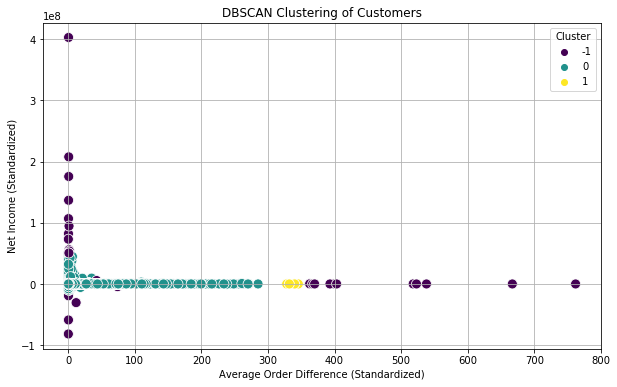

In [169]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = churn_data[['Average Order Difference', 'Net Income']]
data = data.dropna(subset=['Average Order Difference', 'Net Income'])

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Average Order Difference', 'Net Income']])

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Add the cluster labels to the dataframe
data['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Average Order Difference'], y=data['Net Income'], hue=data['cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Average Order Difference (Standardized)')
plt.ylabel('Net Income (Standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


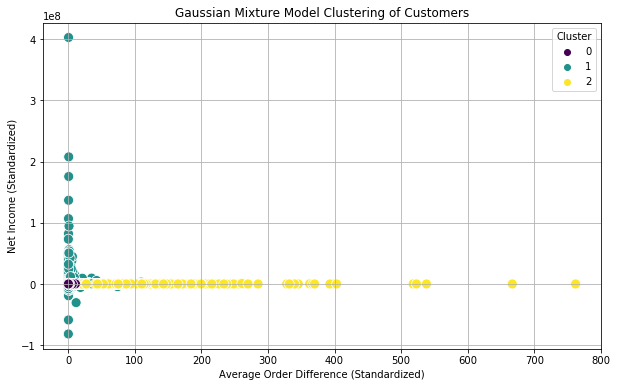

In [175]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = churn_data[['Average Order Difference', 'Net Income']]
data = data.dropna(subset=['Average Order Difference', 'Net Income'])

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Average Order Difference', 'Net Income']])

# Initialize and fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(data_scaled)

# Add the cluster labels to the dataframe
data['cluster'] = gmm_clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Average Order Difference'], y=data['Net Income'], hue=data['cluster'], palette='viridis', s=100)
plt.title('Gaussian Mixture Model Clustering of Customers')
plt.xlabel('Average Order Difference (Standardized)')
plt.ylabel('Net Income (Standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [177]:
# value counts of the clusters
data['cluster'].value_counts()
# describe the clusters
data.groupby('cluster').describe()


Average Order Difference                                             \
                           count       mean        std       min        25%   
cluster                                                                       
0                         4267.0   2.574210   2.520635  0.000000   0.582228   
1                          701.0   7.339722  12.199250  0.000000   0.516220   
2                         1483.0  43.004754  60.443162  8.707317  14.642857   

                                         Net Income                \
               50%        75%        max      count          mean   
cluster                                                             
0         1.683486   4.000000   12.52381     4267.0 -2.047146e+03   
1         1.913462  10.428571  109.50000      701.0  4.622238e+06   
2        23.500000  44.226190  762.00000     1483.0  1.152417e+04   

                                                                            \
                  std           min         25%          50%           75%   
cluster                                                                      
0        2.507316e+05 -9.856465e+05  -57284.836      -49.475  5.024411e+04   
1        2.201578e+07 -8.177395e+07 -817229.910  1226744.552  3.209940e+06   
2        6.359809e+04 -2.825000e+05   -4228.095      774.950  2.309148e+04   

                       
                  max  
cluster                
0        9.933204e+05  
1        4.030140e+08  
2        7.973070e+05

## Total orders distribution graph

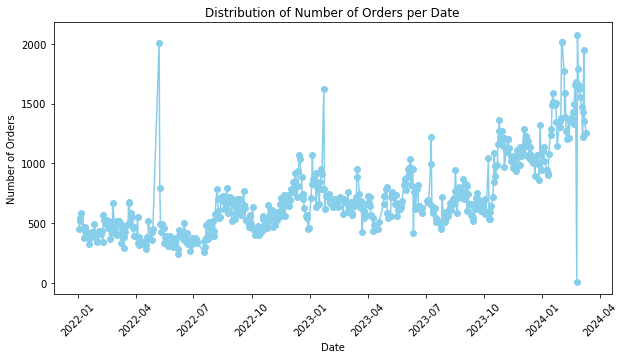

In [ ]:
#cluster the average order difference using k-means with k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
nonan_churn = churn_data.dropna()
nonan_churn['cluster'] = kmeans.fit_predict(nonan_churn[['Average Order Difference']])
nonan_churn['cluster'].value_counts()
#plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nonan_churn, x='Average Order Difference', y='Days Since Last Order', hue='cluster', palette='viridis')
plt.title('Clusters of Customers based on Average Order Difference and Days Since Last Order')
plt.show()